## Build a basic chatbot with 'LangGraph' using 'Graph API'

Components of LangGraph
- Edge = arow in graph
- Nodes = box in graph
- State = variable that can be access by any Node

"State Graph"

input ---> NODE("ChatBot") ---> output

NODE("ChatBot) => LLM + Prompt

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict             # dict type

from langgraph.graph import (
    StateGraph,                                     # whole graph
    START,                                          # start node
    END                                             # end node
)

from langgraph.graph.message import add_messages    # reducers

state_varaiable = {
    messages = [list of all the messages any new message will be appended here]
}

to append the message in messages list we can use "Reducers". 'add_messages' is one of the reducers.

mesages have type list.
the add_messages annotation defines how the 'State' should be updated.
in this case (when we are using add_messages), it appends the message to the list rather than overwriting them

In [63]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
graph_builder = StateGraph(State)

In [64]:
graph_builder

In [65]:
import os
from dotenv import load_dotenv
load_dotenv()

True

### LLM

In [66]:
# defining LLM

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model = "llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c0ed27cb3e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c0ed27cbe90>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [67]:
llm = init_chat_model("groq:llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c0ed27c96a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c0ed260da60>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Node

In [68]:
def chatbot(state: State):
    return {
        "messages": [llm.invoke(state['messages'])]
    }

### Building Graph

we have
- 1 input
- 1 output
- 1 Node
- 2 Edge
- 1 State

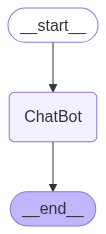

In [69]:
graph_builder = StateGraph(State)

# adding node
graph_builder.add_node("ChatBot", chatbot)

# adding Edge
graph_builder.add_edge(START, "ChatBot")
graph_builder.add_edge("ChatBot", END)

# Compile the Graph
graph = graph_builder.compile()
graph

### Visualize the Graph

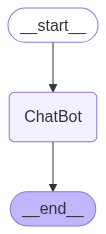

In [70]:
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph().draw_mermaid_png()
        )
    )
except Exception:
    pass

## Running this Graph

In [71]:
response = graph.invoke({"messages": "Hi, how are you? Tell me your model name."})

In [72]:
response

{'messages': [HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='0fad2ead-ec33-4da2-8d7a-0f22d53f5617'),
  AIMessage(content="I'm doing well, thanks for asking! I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm a large language model trained on a massive dataset of text from the internet and can generate human-like responses to a wide range of topics and questions. I'm here to help answer your questions, provide information, or simply chat with you if you'd like!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 22, 'total_tokens': 112, 'completion_time': 0.144415615, 'prompt_time': 0.003894961, 'queue_time': 0.26963816300000004, 'total_time': 0.148310576}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--6c10a335-7f34-42b6-

In [73]:
response["messages"]

[HumanMessage(content='Hi, how are you? Tell me your model name.', additional_kwargs={}, response_metadata={}, id='0fad2ead-ec33-4da2-8d7a-0f22d53f5617'),
 AIMessage(content="I'm doing well, thanks for asking! I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm a large language model trained on a massive dataset of text from the internet and can generate human-like responses to a wide range of topics and questions. I'm here to help answer your questions, provide information, or simply chat with you if you'd like!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 22, 'total_tokens': 112, 'completion_time': 0.144415615, 'prompt_time': 0.003894961, 'queue_time': 0.26963816300000004, 'total_time': 0.148310576}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--6c10a335-7f34-42b6-a5d8-95c05fbd8

In [74]:
graph.invoke({"messages": "what is todays date?"})

{'messages': [HumanMessage(content='what is todays date?', additional_kwargs={}, response_metadata={}, id='b635ca69-bd64-4a43-b2b6-a7a2c318b2ad'),
  AIMessage(content="I'm just an AI, I don't have have access to real-time information, so I don't know the current date. However, I can suggest some ways for you to find out today's date:\n\n1. Check your phone or computer's calendar app.\n2. Look at a newspaper or news website.\n3. Check the date on a clock or watch.\n4. Ask a friend or family member what today's date is.\n\nAlternatively, if you're looking for a specific date in the past or future, I can help you with that. Just let me know what date you're interested in, and I'll do my best to provide the information you need.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 136, 'prompt_tokens': 16, 'total_tokens': 152, 'completion_time': 0.183675917, 'prompt_time': 0.003661288, 'queue_time': 0.270998901, 'total_time': 0.187337205}, 'model_name': 'llama3-8

In [80]:
response["messages"][-1].content

"I'm doing well, thanks for asking! I'm LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm a large language model trained on a massive dataset of text from the internet and can generate human-like responses to a wide range of topics and questions. I'm here to help answer your questions, provide information, or simply chat with you if you'd like!"